In [12]:
from torsion_analysis import *

# Analyze WBO Torsion

This script performs analysis on QCA datasets by finding the torsion barrier from their QCA record and calculating their ELF10 WBO with an AM1 calculation. 

## Data output
After data processing the molecules are stored into an oeb. Each respective OE molecule has the following data stored using datatags: 
 - tdr_object.id : int (id of the TD record) with datatag "TDid"
 - dihedral_indices: list (list of atom indices for which torsion is driven in this record) datatag "TDindices"
 - torsion_barrier: float (torsion barrier energy in KJ/mol, maximum of all the barriers) datatag "TB"
 - cmiles: str (string for the cmiles of the molecule in canonical_isomeric_explicit_hydrogen_mapped_smiles) datatag "cmiles"
 - wbo: float (float of the ELF10 wiberg bond order calculated between the central torsion idicies) datatag "wbo"
 - IDMatch: "IDMatch" that contain the torsion id from .offxml format FF involved in the QCA torsion drive datatag "IDMatch"



## Step 1. Generate oeb files for the specific ForceField

### ***Uncomment lines 26,27 depending on your usage

In [16]:
ff_name = 'openff_unconstrained-1.3.0.offxml'
folder_name = './FF_1.3.0/'

In [17]:
import os
import errno

TD_datasets = ['Fragment Stability Benchmark',
 'Fragmenter paper',
 'OpenFF DANCE 1 eMolecules t142 v1.0',
 'OpenFF Fragmenter Validation 1.0',
 'OpenFF Full TorsionDrive Benchmark 1',
 'OpenFF Gen 2 Torsion Set 1 Roche',
 'OpenFF Gen 2 Torsion Set 1 Roche 2',
 'OpenFF Gen 2 Torsion Set 2 Coverage',
 'OpenFF Gen 2 Torsion Set 2 Coverage 2',
 'OpenFF Gen 2 Torsion Set 3 Pfizer Discrepancy',
 'OpenFF Gen 2 Torsion Set 3 Pfizer Discrepancy 2',
 'OpenFF Gen 2 Torsion Set 4 eMolecules Discrepancy',
 'OpenFF Gen 2 Torsion Set 4 eMolecules Discrepancy 2',
 'OpenFF Gen 2 Torsion Set 5 Bayer',
 'OpenFF Gen 2 Torsion Set 5 Bayer 2',
 'OpenFF Gen 2 Torsion Set 6 Supplemental',
 'OpenFF Gen 2 Torsion Set 6 Supplemental 2',
 'OpenFF Group1 Torsions',
 'OpenFF Group1 Torsions 2',
 'OpenFF Group1 Torsions 3',
 'OpenFF Primary Benchmark 1 Torsion Set',
 'OpenFF Primary Benchmark 2 Torsion Set',
 'OpenFF Primary TorsionDrive Benchmark 1',
 'OpenFF Rowley Biaryl v1.0',
 'OpenFF Substituted Phenyl Set 1',
 'OpenFF-benchmark-ligand-fragments-v1.0',
 'Pfizer Discrepancy Torsion Dataset 1',
 'SMIRNOFF Coverage Torsion Set 1',
#  'SiliconTX Torsion Benchmark Set 1',
 'TorsionDrive Paper']

error_td = []
count = 0

TD_working_oeb = [folder_name+x+'.oeb' for x in TD_datasets]

for td_name in TD_datasets:
    count += 1
    print(td_name)
    filename = folder_name 
    if not os.path.exists(os.path.dirname(filename)):
        try:
            os.makedirs(os.path.dirname(filename))
        except OSError as exc: # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise
                
    filename = filename + td_name
    
    while True:
        try:
#             genData(td_name, filename, ff_name)
#             genPlots(filename+'.oeb', filename+'.pdf')
            break
        except:
            error_td.append(td_name)
            break

    

Fragment Stability Benchmark
Fragmenter paper
OpenFF DANCE 1 eMolecules t142 v1.0
OpenFF Fragmenter Validation 1.0
OpenFF Full TorsionDrive Benchmark 1
OpenFF Gen 2 Torsion Set 1 Roche
OpenFF Gen 2 Torsion Set 1 Roche 2
OpenFF Gen 2 Torsion Set 2 Coverage
OpenFF Gen 2 Torsion Set 2 Coverage 2
OpenFF Gen 2 Torsion Set 3 Pfizer Discrepancy
OpenFF Gen 2 Torsion Set 3 Pfizer Discrepancy 2
OpenFF Gen 2 Torsion Set 4 eMolecules Discrepancy
OpenFF Gen 2 Torsion Set 4 eMolecules Discrepancy 2
OpenFF Gen 2 Torsion Set 5 Bayer
OpenFF Gen 2 Torsion Set 5 Bayer 2
OpenFF Gen 2 Torsion Set 6 Supplemental
OpenFF Gen 2 Torsion Set 6 Supplemental 2
OpenFF Group1 Torsions
OpenFF Group1 Torsions 2
OpenFF Group1 Torsions 3
OpenFF Primary Benchmark 1 Torsion Set
OpenFF Primary Benchmark 2 Torsion Set
OpenFF Primary TorsionDrive Benchmark 1
OpenFF Rowley Biaryl v1.0
OpenFF Substituted Phenyl Set 1
OpenFF-benchmark-ligand-fragments-v1.0
Pfizer Discrepancy Torsion Dataset 1
SMIRNOFF Coverage Torsion Set 1
Tor

## Step 2. Visualize by reading the oeb files

Can use genPlots(), visualize_wbo_correlation_compare() from torsion_anlaysis.py

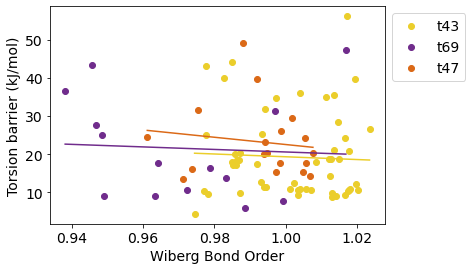

In [4]:
#Let's also add the Rowley dataset and compare 
genPlots(folder_name + 'OpenFF Rowley Biaryl v1.0.oeb', folder_name + 'OpenFF Rowley Biaryl v1.0.pdf')

### Plotly plots and saving to a pdf for all datasets by torsion id

`tids = ['t43', 't69', 't69a', 't72', 't74', 't96', 't97']
for iid in tids:
    tmp = plot_tid_for_datasets(TD_working_oeb, t_id=iid)
    tmp.write_image(folder_name+"fig_"+str(iid)+".pdf")`

In [18]:
tig_ids = ['t43', 't69', 't69a', 't72', 't74', 't96', 't97']
# ['TIG0', TIG1', 'TIG2', 'TIG3', 'TIG4', 'TIG5', 'TIG6', 'TIG7', 'TIG8']
for iid in tig_ids:
    tmp = plot_tid_for_datasets(TD_working_oeb, t_id=iid)
    tmp.write_image(folder_name+"fig_"+str(iid)+".pdf")

tid:  t43 r_value:  0.82272786065585 slope:  516.1768094538851 intercept:  -493.1300638906191


tid:  t69 r_value:  0.38954851747443975 slope:  99.8022013352975 intercept:  -76.06195340118205


tid:  t69a r_value:  0.2524316934289752 slope:  186.35294843434548 intercept:  -139.00938048582765


tid:  t72 r_value:  0.8263666065601866 slope:  400.3603316129027 intercept:  -343.26797691627957


tid:  t74 r_value:  0.8986448767737627 slope:  587.3035983429953 intercept:  -540.0989489726342


tid:  t96 r_value:  0.29155090208664797 slope:  127.45249942366912 intercept:  -111.41042513421661


tid:  t97 r_value:  0.16836260981545084 slope:  129.25082559817088 intercept:  -115.28389791295297


In [8]:
from smarts_torsions import *

In [10]:
import qcportal as ptl
client = ptl.FractalClient()  
smarts = "[*:1]~[#6X3:2]~[#6X3:3]~[*:4]"
datasets = TD_datasets
tdrs = get_torsiondrives_matching_smarts(smarts, datasets, client)

In [11]:
len(tdrs)

553